In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mar  9 11:31:23 2020

@author: rithik
"""

import torch
import torchvision
from torchvision import transforms,datasets
import numpy as np
from matplotlib import pyplot as plt

a=torch.Tensor([1,2,3])
b=torch.Tensor([4,5,6])

print(a)

print(a*b)

c=np.array(a)
print(c)

''' This .Tensor() function is used to convert the numpy array into tensor'''
d=torch.Tensor(c)
print(d)

e=torch.tensor(c)
print(e)

''' View is similar to reshape'''
''' Here for shape input should be a list unlike numpy'''


print(b.view((3,1)))

tensor([1., 2., 3.])
tensor([ 4., 10., 18.])
[1. 2. 3.]
tensor([1., 2., 3.])
tensor([1., 2., 3.])
tensor([[4.],
        [5.],
        [6.]])


15000
2
4
4
<class 'list'>
torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])
tensor([3, 5, 0, 8])


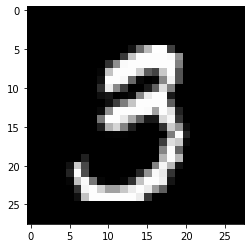

'dataiter = iter(trainset)\nimages, labels = dataiter.next()\nplt.imshow(torchvision.utils.make_grid(images))\nplt.show()'

In [59]:
train=datasets.MNIST(root=".",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))

test=datasets.MNIST(root=".",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

trainset=torch.utils.data.DataLoader(train,batch_size=4,shuffle=True)

testset=torch.utils.data.DataLoader(test,batch_size=4,shuffle=True)

count=0
c=[]

for data in trainset:
    #print(data[1])
    c.append(data)
    count=count+1
    #break

print(count)        #(15000*4) no of smaples in the training dataset

#x,y=data[0][0],data[1][0]
#print(data.get_shape())
print(len(data))
print(len(data[0]))
print(len(data[1]))
print(type(data))
#print(data.shape)               #data is not a torch object it's a list object so .shape function doesn't work 
print(data[0].shape)
print(data[0][0].shape)
print(data[0][0][0][1].shape)
print(data[0][0][0][1])          #Tensor object so .shape function works
#print(data[0][0])
print(data[1])
#print(y)

%matplotlib inline
plt.imshow((np.array(data[0][0])).reshape(28,28),cmap='gray')   #for plotting input has to be numpy array only
#spelling of 'gray' is important
plt.show()

'''
first_image = data[0][0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show() '''


In [60]:
'''Training the Neural Networks'''
import torch.nn as nn                       #Used for object oriented
import torch.nn.functional as F             #used for the Functional Oriented

class Net(nn.Module):                       #Here M is capital in Module
    def __init__(self):
        super().__init__()                  #Don't forget it it's important
        self.fc1=nn.Linear(28*28,64)
        self.fc2=nn.Linear(64,64)
        self.fc3=nn.Linear(64,64)
        self.fc4=nn.Linear(64,10)
    
    
    def forward(self,x):                    
        #Defines how the data should flow through the network and we are using it as a constructor as self is also
        #a parameter
        
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=(self.fc4(x))
        return F.log_softmax(x,dim=1)     #Here Just like sigmid we calculate something

net=Net()


In [61]:
'''Testing For the Randomly Genearted Datasets'''

x=torch.rand((28,28))
#print(x)
x=x.view(1,28*28)                #Here (-1,1) doesn't work
output=net(x)

print(output)

tensor([[-2.4158, -2.2976, -2.3539, -2.4092, -2.2832, -2.2174, -2.3069, -2.2095,
         -2.3460, -2.2128]], grad_fn=<LogSoftmaxBackward>)


In [62]:
'''Training the datasets'''

import torch.optim as optim

optimiser=optim.Adam(net.parameters(),lr=0.001)

num_iter=5

for i in range(num_iter):
    
    for data in trainset:
        
        X,y=data
        
        net.zero_grad()                 #As we are training in a batch after a batch the gradient should be zero
       
        output=net(X.view(-1,28*28))
        
        loss=F.nll_loss(output,y)       #Generally used if the predicted output is not in the one-hot vector form
        
        loss.backward()                           #It back propogates the loss calculated
        
        optimiser.step()                          #Used in adjusting the weights in neural Networks
    
    print(loss)

#Takes a lot of time like approx 3 min depends on the processor

tensor(0.0030, grad_fn=<NllLossBackward>)
tensor(0.0038, grad_fn=<NllLossBackward>)
tensor(0.0003, grad_fn=<NllLossBackward>)
tensor(0.0003, grad_fn=<NllLossBackward>)
tensor(0.0001, grad_fn=<NllLossBackward>)


In [63]:
with torch.no_grad():                   
    # If the data is not used and if we want to test it then gradient shouldn't be applied so we tell this function
    # to use if the gradient is not calculated
    total=0
    count=0
    for data in trainset:
        x,y = data                                    #Divied into batcches of group 4 as specified during input
        output = net(x.view(-1,28*28))
        for index,value in enumerate(output):
            if(torch.argmax(value)==y[index]):       #It's not output.argmax() its torch.argmax()
                count+=1;
            total+=1;
print("Accuracy is " ,100*round(count/total,3))      #Mostly (97-99)

Accuracy is  98.2


Y is  tensor(7)


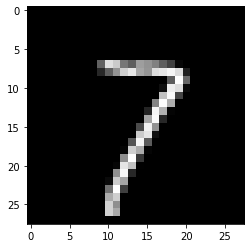

In [71]:
plt.imshow(x[2].view(28,28),cmap='gray')
#plt.show()
print("Y is ",y[2])